## Variable Notes
<ul>
<li>
<ol>
pclass: A proxy for socio-economic status (SES)
<li>1st = Upper </li>
<li>2nd = Middle </li>
<li>3rd = Lower </li>
</ol>
</li>

<li>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</li>

<li>sibsp: The dataset defines family relations in this way...
<ul>
<li>Sibling = brother, sister, stepbrother, stepsister</li>
<li>Spouse = husband, wife (mistresses and fiancés were ignored)</li>
</ul>
</li>

<li>parch: The dataset defines family relations in this way...
<ul>
<li>Parent = mother, father</li>
<li>Child = daughter, son, stepdaughter, stepson</li>
<li>Some children travelled only with a nanny, therefore parch=0 for them.</li>
</ul>
</li>
</ul>

In [1]:
import matplotlib.pyplot as plt
!pip install matplotlib

In [ ]:
!pip install Flask-Bootstrap4

<img src="ressources/image1.png">

<img src="ressources/image2.png">

<img src="ressources/image3.png">

<img src="ressources/image16.png">

<img src="ressources/image17.png">

<img src="ressources/image18.png">

<img src="ressources/image21.png">

<img src="ressources/image4.png">

<img src="ressources/image5.png">

<img src="ressources/image6.png">

<img src="ressources/image7.png">

<img src="ressources/image8.png">

In [98]:
import numpy as np
X = np.array([1,2,4,3,4,2,4,3,4,3])
Y1 = 3*X
Y = np.array([2,5,4,7.5,6,2,1,2,1,6])
Y2 =np.array([2.1,4,8.5,6.1,8.2,4,6,6,6,4])
len(Y2) == len(X)

True

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
my_dict = dict(x =X,y=Y)
df = pd.DataFrame(my_dict)
df.head()
df.corr()



,x,y
x,1.00000,0.04471
y,0.04471,1.00000


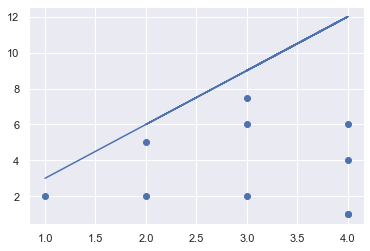

In [100]:
plt.scatter(X,Y)
plt.plot(X,3*X)

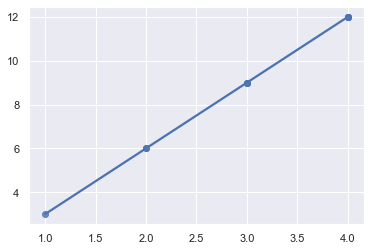

In [101]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X, y=Y1, data=tips)

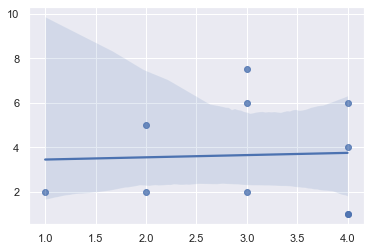

In [102]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X, y=Y, data=tips)

,x,y,y1
x,1.000000,-0.873163,0.044710
y,-0.873163,1.000000,-0.207381
y1,0.044710,-0.207381,1.000000


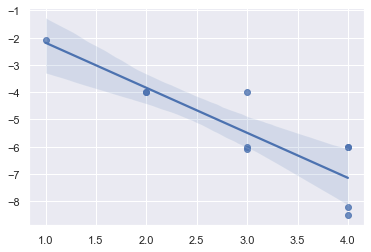

In [108]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X, y=-Y2, data=tips)
my_dict = dict(x =X,y=-Y2,y1=Y)



In [131]:
X = np.array([1,2,4,5,3,5,3,4,2,3,2])
len(X)

11

In [132]:
X1= -2*X

In [133]:
X2 = [1,4.2,2,3,5,2,4,5,2,4,2]
len(X2)

11

In [134]:
Y = 2*X1 +X2
map_dict= dict(x=X,x1=X1,x2=X2,y=Y)
df = pd.DataFrame(map_dict)

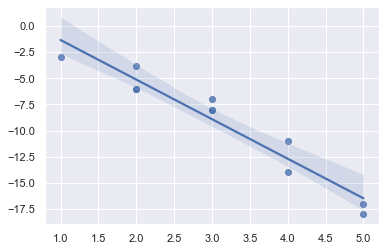

In [135]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X, y=Y, data=tips)


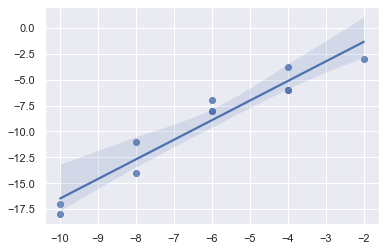

In [136]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X1, y=Y, data=tips)


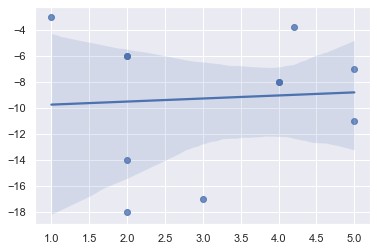

In [137]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=X2, y=Y, data=tips)

In [148]:
df.corr()

,x,x1,x2,y
x,1.000000,-1.000000,0.204264,-0.963806
x1,-1.000000,1.000000,-0.204264,0.963806
x2,0.204264,-0.204264,1.000000,0.064112
y,-0.963806,0.963806,0.064112,1.000000


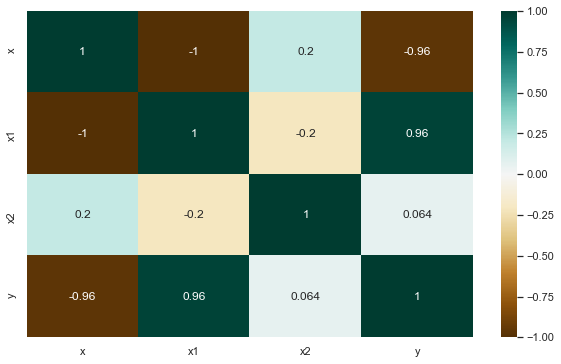

In [139]:
#Step5: Annotate each cell with the numeric value
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)      #adjusting the color and adding annotation (actual correlation values) makes it easier to form a conclusion 

<img src="ressources/image9.png">

<img src="ressources/image10.png">

<img src="ressources/image11.png">

<img src="ressources/image12.png">

<img src="ressources/image13.png">

<img src="ressources/image14.png">

<img src="ressources/image15.png">

# 1.  Import all librairies and datasets

In [4]:
# import all librairies needed for this model

import pandas as pd # for dataframe computaion
import numpy as np # vector computation
import matplotlib.pyplot as plt # for plot
import seaborn as sns # for plot
from sklearn.preprocessing import LabelEncoder, StandardScaler # for data preprocessing
from sklearn.linear_model import LogisticRegression  # for logistic regression
from sklearn.model_selection import train_test_split # for splitting and train and test datastet randomly
from sklearn.metrics import classification_report # for metrics and model evaluation
from sklearn.impute import SimpleImputer # for data preprocessing

In [5]:
# import dataset 
url_test = "datasets/test.csv"
url_train= "datasets/train.csv"

In [6]:
train_df = pd.read_csv(url_train)
test_df =  pd.read_csv(url_test)

# 2. Missing Values

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
np.round(train_df.isna().sum()/train_df.shape[0],2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

In [55]:
cols = [col for col in train_df.columns if col not in ['PassengerId','Cabin']]
train_df = train_df[cols]

In [56]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [57]:
# SimpleImputer

# Embarked column
simple_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
values = simple_1.fit_transform(train_df[['Embarked']].values)
train_df['Embarked'] =  values

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
# Embarked column
simple_1 = SimpleImputer(missing_values=np.nan, strategy='median')
values = simple_1.fit_transform(train_df[['Age']].values)
train_df['Age'] =  values

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
train_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [62]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


In [63]:
map_sex = {'male':1,'female':0}
train_df['Sex'] = train_df['Sex'].replace(map_sex)

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
embarked_map = {'S':0,'C':1,'Q':2}
train_df['Embarked'] = train_df['Embarked'].replace(embarked_map)

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex [1 0]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked [0 1 2]


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


# 3. Verify well data types

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [68]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 4. Find oultiers

## 1 Example

In [69]:
Q1 = train_df.describe().T['25%']
Q3 = train_df.describe().T['75%']
train_IQR = Q3-Q1
train_IQR

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64

In [70]:
Q1 = test_df.describe().T['25%']
Q3 = test_df.describe().T['75%']
test_IQR = Q3-Q1
test_IQR

PassengerId    208.5000
Pclass           2.0000
Age             18.0000
SibSp            1.0000
Parch            0.0000
Fare            23.6042
dtype: float64

## Example 2

In [71]:
#Step1: Calculate the IQR
train_df_iqr = train_df
Q1 = train_df_iqr.quantile(0.25)
Q3 = train_df_iqr.quantile(0.75)
IQR = Q3 - Q1
MIN_RANGE = Q1 - 1.5 * IQR
MAX_RANGE = Q3+ 1.5 *IQR
(train_df_iqr < (Q1 - 1.5 * IQR))

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False


In [72]:

df_outliers = (train_df_iqr < (Q1 - 1.5 * IQR)) |(train_df_iqr > (Q3 + 1.5 * IQR))
df_outliers.head()
train_out = train_df_iqr[~((train_df_iqr < (Q1 - 1.5 * IQR)) |(train_df_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape
train_out.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
5,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,2


In [73]:
percent_  =round( (train_out.shape[0] / train_df.shape[0]) *100,2)
percent_

64.76

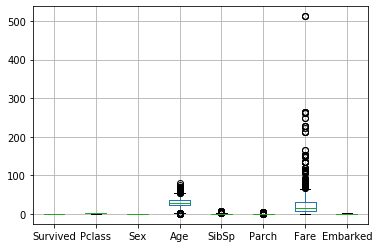

In [74]:
train_df.boxplot()

# 5. Removes duplicates

In [75]:
train_out.shape

(577, 10)

In [76]:
train_out.drop_duplicates(inplace=True)
train_out.shape

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(577, 10)

# 6. Exploratory Data Analysis

## UNIVARIATE EDA

In [77]:
col_cat

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [90]:
for col in col_cat:
    display(train_df.groupby(col).size().to_frame().rename(columns={0:'count'}).reset_index())

,Survived,count
0,0,549
1,1,342


,Pclass,count
0,1,216
1,2,184
2,3,491


,Sex,count
0,0,314
1,1,577


,SibSp,count
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18
5,5,5
6,8,7


,Parch,count
0,0,678
1,1,118
2,2,80
3,3,5
4,4,4
5,5,5
6,6,1


,Embarked,count
0,0,646
1,1,168
2,2,77


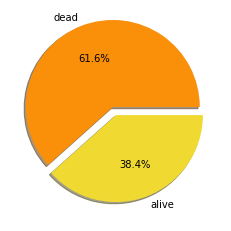

In [102]:
# Survivded
df =train_df.groupby(['Survived']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels= ['dead','alive']
values= df['count']
colors = ['#FA8F0A','#F0DA32']
explode = (0.1, 0)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)
plt.show()

6


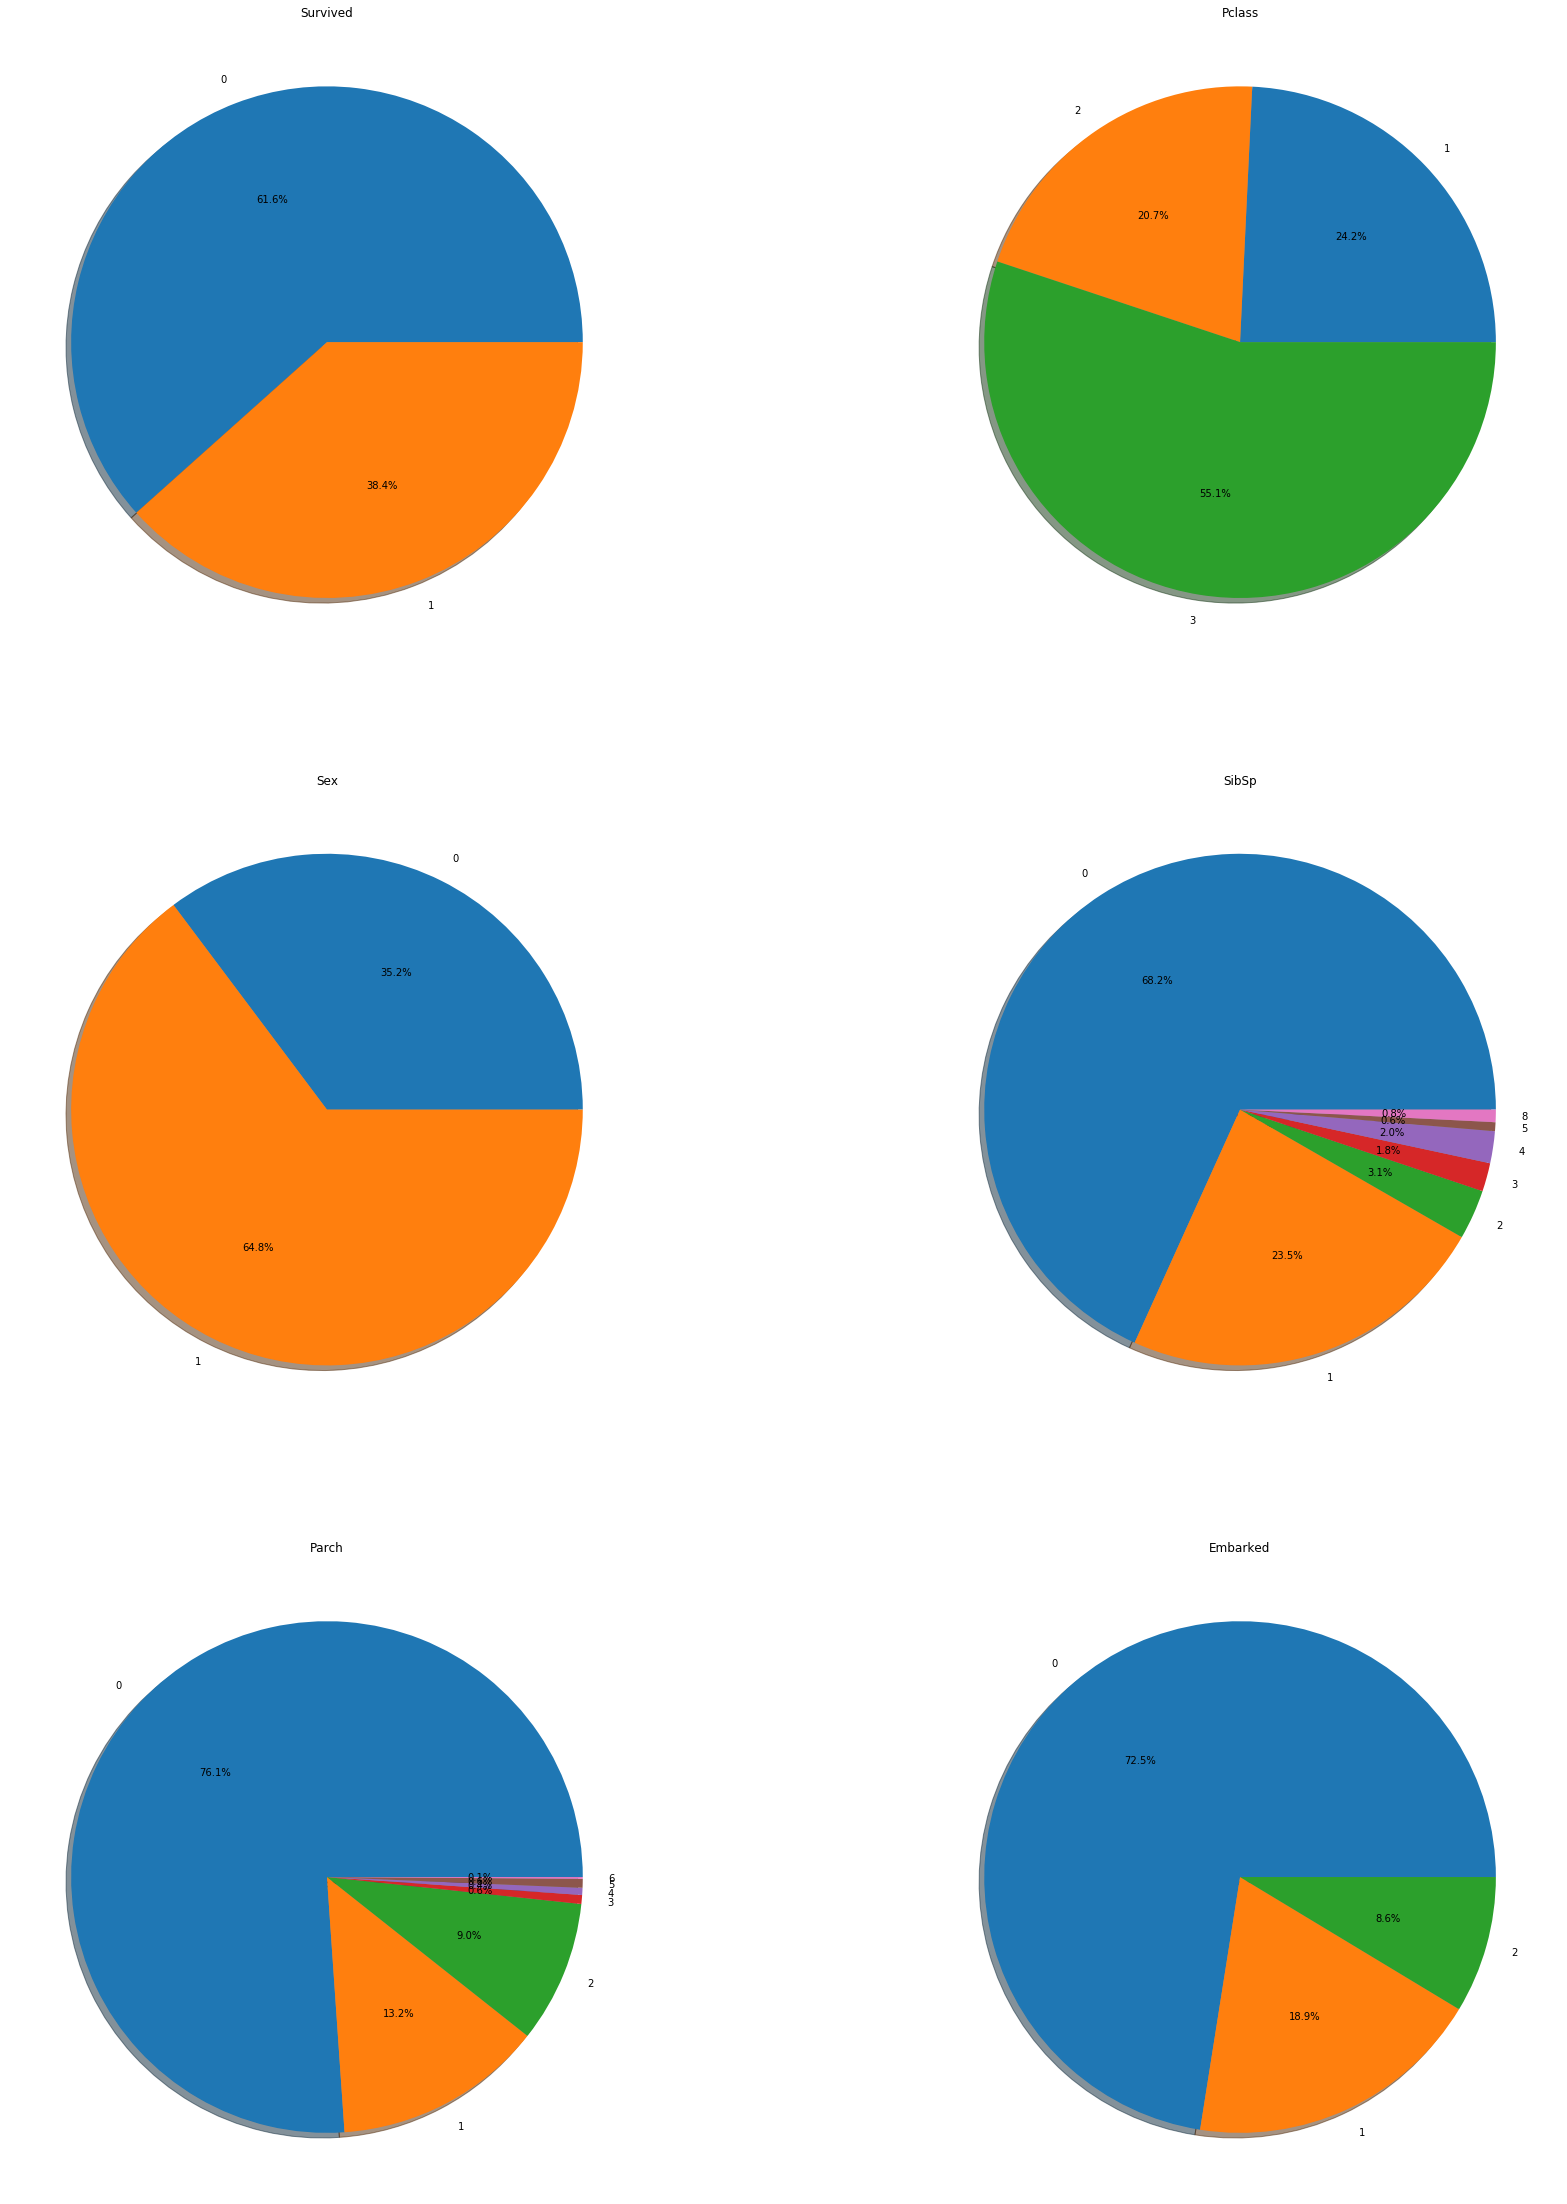

In [120]:

print(len(col_cat))

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(30,40))
index = 0
for row in ax:
    for col in row:
        df =train_df.groupby([col_cat[index]]).size().to_frame().rename(columns={0:'count'}).reset_index()
        labels= df[col_cat[index]]
        values= df['count']
        col.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
        col.set_title(col_cat[index])
        index+=1  

plt.show()

([<matplotlib.patches.Wedge at 0x2258f8490c8>,
 [Text(1.0733844937337091, 0.5365125614671377, 'female'),
  Text(-0.9839357859225668, -0.49180318134487605, 'male')],
 [Text(0.626140954677997, 0.3129656608558302, '14.8%'),
  Text(-0.5366922468668546, -0.2682562807335687, '85.2%')])

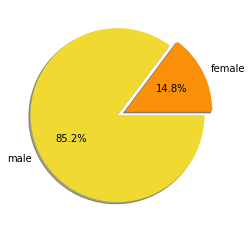

In [121]:
# Survivded
df =train_df[train_df.Survived == 0].groupby(['Sex']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels= ['female','male']
values= df['count']
colors = ['#FA8F0A','#F0DA32']
explode = (0.1, 0)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)

([<matplotlib.patches.Wedge at 0x22590193548>,
 [Text(1.0764370529718539, 0.5303614531517825, '1'),
  Text(0.10997203302849645, 1.0944889912427533, '2'),
  Text(-0.582377329516148, -0.9331862869039815, '3')],
 [Text(0.6279216142335814, 0.30937751433853977, '14.6%'),
  Text(0.05998474528827079, 0.5969939952233199, '17.7%'),
  Text(-0.3176603615542625, -0.5090107019476262, '67.8%')])

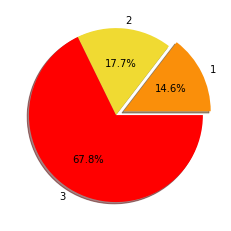

In [125]:
# Survivded
df =train_df[train_df.Survived == 0].groupby(['Pclass']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels=df['Pclass'] 
values= df['count']
colors = ['#FA8F0A','#F0DA32','red']
explode = (0.1, 0,0)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)

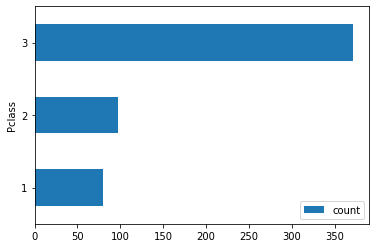

In [127]:
df.plot(kind='barh',x='Pclass',y = 'count')

##  Numerical values

In [134]:
col_num = [x for x in train_df.columns if x not in col_cat+['Name','Ticket']]
col_num

['Age', 'Fare']

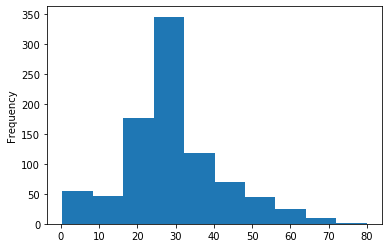

In [135]:
df_num = train_df[col_num]
df_num[col_num[0]].plot(kind='hist')

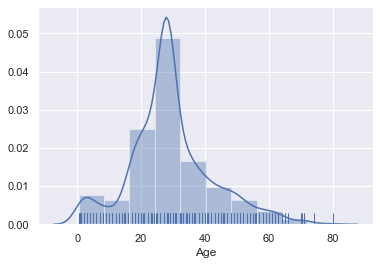

In [142]:
sns.distplot(df_num[col_num[0]], bins=10, kde=True, rug=True);

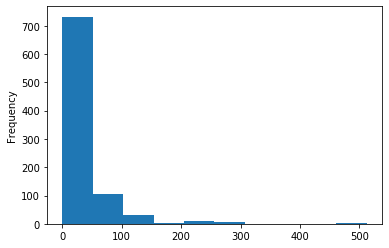

In [136]:
df_num = train_df[col_num]
df_num[col_num[1]].plot(kind='hist')

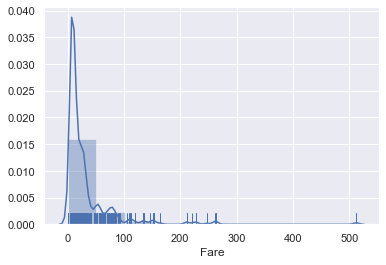

In [144]:
sns.distplot(df_num[col_num[1]], bins=10, kde=True, rug=True);

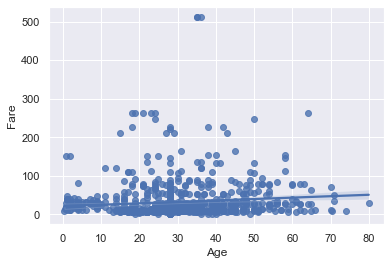

In [137]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=col_num[0], y=col_num[1], data=df_num)

In [138]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


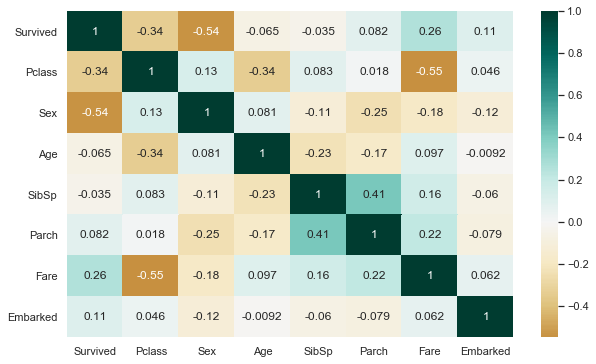

In [140]:
#Step5: Annotate each cell with the numeric value
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train_df.corr(), center=0, cmap='BrBG', annot=True) 

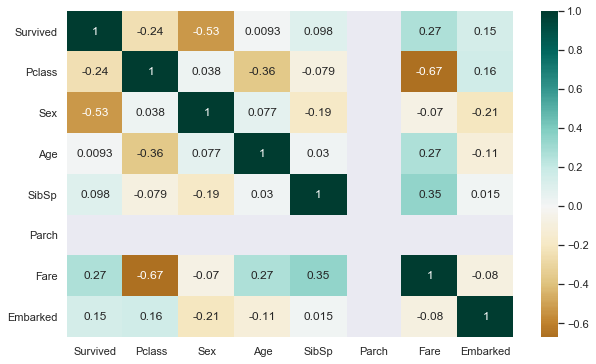

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train_out.corr(), center=0, cmap='BrBG', annot=True) 

In [145]:
def change_age_rage(x):
    if x >= 20 and x<= 40:
        return 1
    return 0

In [152]:
def change_fare_rage(x):
    if x >= 0 and x<= 100:
        return 1
    return 0

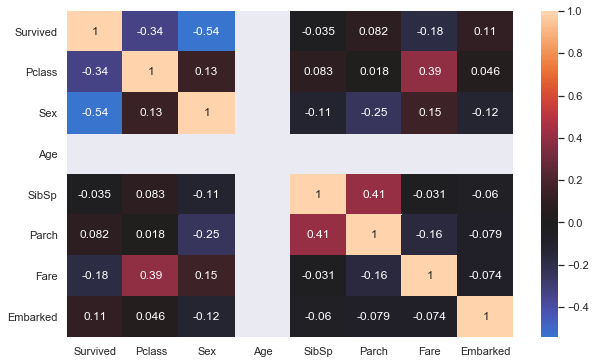

In [154]:
train_df['Fare'] = train_df['Fare'].apply(lambda x : change_fare_rage(x))
#Step5: Annotate each cell with the numeric value
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train_df.corr(), center=0, annot=True) 

In [47]:
# Null values 
display(train_df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [49]:
np.round(train_df.isna().sum()/train_df.shape[0],2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

In [50]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


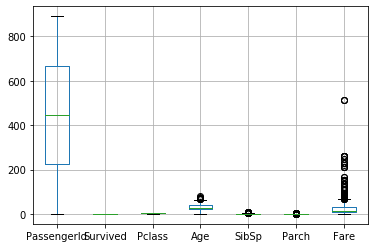

In [51]:
train_df.boxplot()

In [52]:
columns = [x for x in train_df.columns if x not in ['PassengerId','Cabin']]

In [53]:
for col in columns:
    print(col,len(train_df[col].unique()) )

Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


In [54]:
train_df[columns].dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [55]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


In [56]:
map_sex = {'female': 0,'male': 1}
train_df['Sex_num'] = train_df['Sex'].replace(map_sex)

In [57]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


In [59]:
map_embarked = {'S': 0,'C': 1, 'Q':3}

In [60]:
train_df['Embarked_Num'] = train_df['Embarked'].replace(map_embarked)

In [62]:
train_df[['Sex_num','Sex']]

,Sex_num,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male
...,...,...
886,1,male
887,0,female
888,0,female
889,1,male


In [85]:
# SimpleImputer

# Embarked column
simple_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
values = simple_1.fit_transform(train_df[['Embarked']].values)
train_df['Embarked'] =  values

In [87]:
train_df['Embarked'].isna().sum()

0